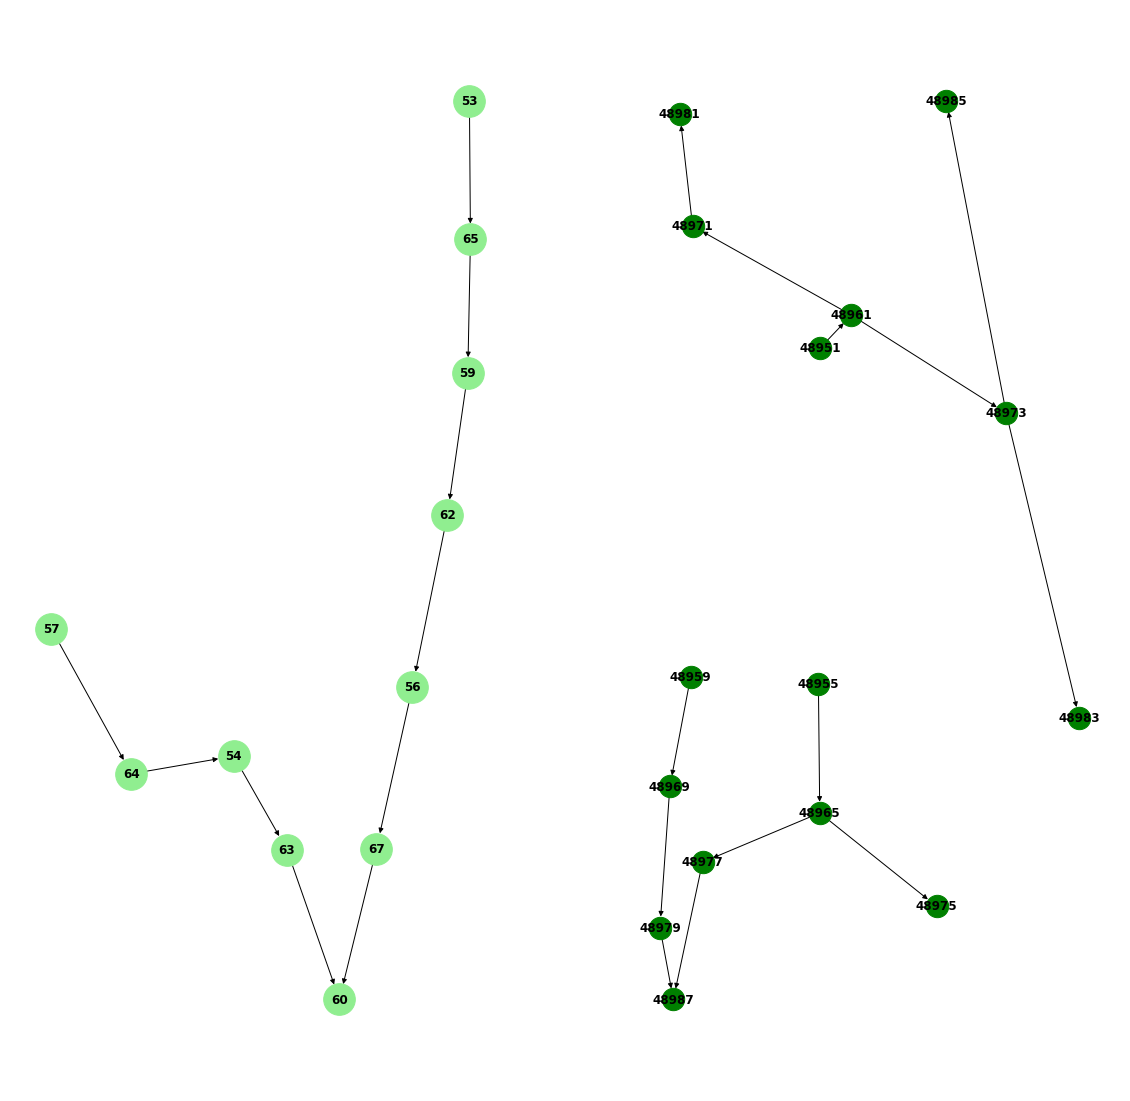

In [1]:
from GraphBasedDistanceMeasure import ScenarioGraph
from commonroad.common.file_reader import CommonRoadFileReader
import networkx as nx
import matplotlib.pyplot as plt

# generate path of the file to be opened
#file_path = "data_files/ZAM_Tutorial-1_1_T-1.xml"
#file_path2 = "data_files/ZAM_Tjunction-1_66_T-1.xml"
file_path = "data_files/CHN_Cho-2_1_T-1.xml"
file_path2 = "data_files/DEU_A9-1_1_T-1.xml"

# read in the scenario and planning problem set
crf = CommonRoadFileReader(file_path)
scenario, planning_problem_set = crf.open()

crf2 = CommonRoadFileReader(file_path2)
scenario2, planning_problem_set2 = crf2.open()

#for graph attributes
options1 = {
    'node_color': 'lightgreen',
    'node_size': 1000,
    'width': 1,
}

options2 = {
    'node_color': 'green',
    'node_size': 500,
    'width': 1,
}

plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#################################BRIEF USAGE###############################################
###########################################################################################
#############################GBDM Sample Usage ############################################
###########################################################################################
#Creata an ScenariGraph object
SG_1 = ScenarioGraph(scenario, planning_problem_set)
SG_2 = ScenarioGraph(scenario2, planning_problem_set2)
#SG_1.CreateLaneletGraph()  #you dont need to create graph. It created in constructer method

plt.subplot(1, 2, 1)
nx.draw(SG_1.scenario_graph,with_labels=True, font_weight='bold', **options1)
plt.subplot(1, 2, 2)
nx.draw(SG_2.scenario_graph,with_labels=True, font_weight='bold', **options2)
plt.show()

In [2]:
SG_1 = ScenarioGraph(scenario, planning_problem_set)
print (SG_1.vehicle_objects_dict)
vehicle_objects = SG_1.vehicle_objects_dict


for vehicle_dict_id in vehicle_objects:
    print("vehicle object:  ", vehicle_objects[vehicle_dict_id])
    print("vehicle_info:    ", vehicle_objects[vehicle_dict_id].vehicle_info)
    
    #Initial_state usage
    print("**vehicle_info.initial_state:    ", (vehicle_objects[vehicle_dict_id].vehicle_info["initial_state"]))
    print("vehicle_initial_state:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state)
    print("vehicle_initial_state.velocity:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state.velocity)
    print("vehicle_initial_state.position:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state.position)
    
    
    print("vehicle_graph:   ", vehicle_objects[vehicle_dict_id].vehicle_graph)
    print("distance_sensor: ", vehicle_objects[vehicle_dict_id].distance_sensor)
    print("distance_sensor.vehicles_in_range: ", vehicle_objects[vehicle_dict_id].distance_sensor.vehicles_in_range)
    #print("score_array:     ", vehicle_objects[vehicle_dict_id].score_array)
    #print("group_array:     ", vehicle_objects[vehicle_dict_id].group_array)
    #print("knowledge_base:  ", vehicle_objects[vehicle_dict_id].knowledge_base)
    
    print("___________________________________________________________________________________________________")

{-1: <Vehicle.Vehicle object at 0x7fcf90455910>, 35: <Vehicle.Vehicle object at 0x7fcf9045f910>, 39: <Vehicle.Vehicle object at 0x7fcf61bb6290>, 311: <Vehicle.Vehicle object at 0x7fcf61bb6690>, 313: <Vehicle.Vehicle object at 0x7fcf61bb6450>, 315: <Vehicle.Vehicle object at 0x7fcf61bb6650>, 317: <Vehicle.Vehicle object at 0x7fcf61bb6990>, 318: <Vehicle.Vehicle object at 0x7fcf61bb6510>, 319: <Vehicle.Vehicle object at 0x7fcf61bb62d0>, 320: <Vehicle.Vehicle object at 0x7fcf61bb6090>, 321: <Vehicle.Vehicle object at 0x7fcf61bb6a50>, 322: <Vehicle.Vehicle object at 0x7fcf61bb6410>, 323: <Vehicle.Vehicle object at 0x7fcf61bb6d10>, 324: <Vehicle.Vehicle object at 0x7fcf6282b250>, 326: <Vehicle.Vehicle object at 0x7fcf6282bb90>, 327: <Vehicle.Vehicle object at 0x7fcf6283f2d0>, 328: <Vehicle.Vehicle object at 0x7fcf6283f110>, 329: <Vehicle.Vehicle object at 0x7fcf6283fad0>, 330: <Vehicle.Vehicle object at 0x7fcf6283f350>, 331: <Vehicle.Vehicle object at 0x7fcf6283f3d0>}
vehicle object:   <Veh

In [3]:

for vehicle in vehicle_objects.values():
    vehicle.score_dict=vehicle.ScoreDictConstructor(vehicle_objects, SG_1)
    #print (vehicle)
print (vehicle_objects[331])

In [4]:
#print (vehicle_objects)
veh=(list(vehicle_objects.values()))
for x in veh:
    print(x.score_dict)

{321: 0.0, 327: 0.0, 323: 255.47362022216595, 324: 255.47362022216595, 326: 255.47362022216595}
{311: 10.072084910409572, 315: 28.58138330930538}
{311: 0.0}
{39: 0.0, 35: 10.072084910409572, 315: 28.58138330930538}
{318: 1.0658141036401503e-14, 317: 106.28953960836328, 320: 106.28953960836328, 322: 140.02850446117304}
{317: 4.625613207295132, 35: 28.58138330930538, 311: 28.58138330930538}
{315: 4.625613207295132, 320: 11.035949526547334, 313: 106.28953960836328}
{321: 0, 313: 1.0658141036401503e-14, 320: 106.28953960836328, 319: 140.02850446117304, 322: 140.02850446117304, 324: 182.6733837462936}
{322: 0, 323: 0, 324: 0, 318: 140.02850446117304, 321: 180.88154664854488}
{322: 0, 317: 11.035949526547334, 313: 106.28953960836328, 318: 106.28953960836328}
{-1: 0.0, 318: 0, 319: 180.88154664854488, 322: 180.88154664854488, 324: 182.6733837462936, 323: 201.23627332880466, 326: 201.23627332880466}
{319: 0, 320: 0, 324: 0, 313: 140.02850446117304, 318: 140.02850446117304, 321: 180.88154664854

In [5]:
for vehicle in vehicle_objects.values():
    
    vehicle.GroupArrayConstructor(vehicle_objects)

In [6]:
veh=(list(vehicle_objects.values()))
for x in veh:
    print(x.group_array)

[323, 324, 326]
[311, 315]
[]
[35, 315]
[317, 320, 322]
[35, 311, 317]
[313, 315, 320]
[320, 319, 322, 324]
[318, 321]
[313, 317, 318]
[319, 322, 324, 323, 326]
[313, 318, 321]
[-1, 321]
[-1, 318, 321]
[-1, 321, 327]
[326]
[]
[]
[]
[]
